# Overview

The *2024 World Happiness Report* compiles data and analysis on the state of happiness around the world. As a collaboration between Gallup, the Oxford Wellbeing Research Centre, the UN Sustainable Development Solutions Network, and the WHR's Editorial Board, the report includes rankings of average happiness scores (referred to as *life ladder*) as well as data for measures of national well-being.

I use data from Table 2.1 of the *World Happiness Report 2024* to answer the following questions:
- What are the distributions of the variables?
- What are the top 10 and bottom 10 countries for each variable?
- How are these variables correlated with each other?
- What are the distributions of the variables within each SDG region? (Applying data from the UN SDG)
- What are the regional averages for each variable, and how have they changed over time?
- Using the latest data (2023), can we accurately predict a happiness score based on values for each variable?

**Datasets/References:**
* *2024 World Happiness Report*: https://worldhappiness.report/ed/2024/
* *2024 World Happiness Report Data for Table 2.1* (Automatic download): https://happiness-report.s3.amazonaws.com/2024/DataForTable2.1.xls
* *2024 World Happiness Report Statistical Appendix 1 for Chapter 2* (Details about variables and data collection): https://happiness-report.s3.amazonaws.com/2024/Ch2+Appendix.pdf
* *World Regions in the SDG Framework* (SDG region designations): https://ourworldindata.org/grapher/world-regions-sdg-united-nations

# Exploratory Data Analysis
* Understanding dataset
* Data cleaning and structuring
* Basic visualizations and analysis

## Learning about the dataset
The dataset consists of the following 11 columns:
* **Country name**
* **year**
* **Life Ladder**: Happiness score/subjective well-being
* **Log GDP per capita**: Natural log of the GDP per capita in purchasing power parity at constant 2017 international dollar prices
* **Social support**: Having someone to count on in times of trouble; national average of responses to the question: "If you were in trouble, do you have relatives or friends you can count on to help you whenever you need them, or not?"
* **Healthy life expectancy at birth**: Average number of years that a person can expect to live in "full health" by taking into account years lived in less than full health due to disease and/or injury (Defintion from the [World Health Organization](https://www.who.int/data/gho/indicator-metadata-registry/imr-details/66)).
* **Freedom to make life choices**: National average of responses to the question "Are you satisfied or dissatisfied with your freedom to choose what you do with your life?"
* **Generosity**: Residual of regressing national average of response to the question "Have you donated money to a charity in the past month?" on GDP per capita.
* **Perceptions of corruption**: National average of the survey responses to two questions: "Is corruption widespread throughout the government or not" and "Is corruption widespread within businesses or not?"
* **Positive affect**: Average of three positive affect measures in GWP: laugh, enjoyment and doing interesting things in the Gallup World Poll. These
measures are the responses to the following three questions, respectively: "Did you smile or laugh a lot yesterday?", and "Did you experience the following
feelings during A LOT OF THE DAY yesterday? How about Enjoyment?", "Did you learn or do something interesting yesterday?"
* **Negative affect**: Average of three negative affect measures in GWP. They are worry, sadness and anger, respectively the responses to "Did you experience the following feelings during A LOT OF THE DAY yesterday? How about Worry?", "Did you experience the following feelings during A LOT OF THE DAY yesterday? How about Sadness?", and "Did you experience the following feelings during A LOT OF THE DAY yesterday? How about Anger?"

All definitions are taken from the [*2024 World Happiness Report Statistical Appendix 1 for Chapter 2*](https://happiness-report.s3.amazonaws.com/2024/Ch2+Appendix.pdf) unless otherwise stated.


**Notes**:
* No duplicates😀
* Some entries have missing data


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

%matplotlib inline

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Data Analytics/World Happiness Data.xls')

In [ ]:
df.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.164055,0.881686,0.414297,0.258195
1,Afghanistan,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.187297,0.850035,0.481421,0.237092
2,Afghanistan,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.117861,0.706766,0.516907,0.275324
3,Afghanistan,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.160098,0.731109,0.479835,0.267175
4,Afghanistan,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.234157,0.775620,0.613513,0.267919


In [ ]:
df.describe()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
count,2363.000000,2363.000000,2335.000000,2350.000000,2300.000000,2327.000000,2282.000000,2238.000000,2339.000000,2347.000000
mean,2014.763860,5.483562,9.399673,0.809369,63.401828,0.750290,0.000096,0.743959,0.651878,0.273160
std,5.059436,1.125523,1.152062,0.121211,6.842644,0.139366,0.161386,0.184871,0.106249,0.087133
min,2005.000000,1.281271,5.526723,0.228217,6.720000,0.228301,-0.339547,0.035198,0.178886,0.082737
25%,2011.000000,4.646750,8.506165,0.743811,59.195001,0.660706,-0.111940,0.686784,0.571977,0.208559
50%,2015.000000,5.448725,9.502946,0.834395,65.099998,0.771122,-0.021613,0.798497,0.663420,0.262175
75%,2019.000000,6.323592,10.392974,0.903779,68.552502,0.861740,0.093569,0.867557,0.737262,0.326211
max,2023.000000,8.018934,11.675588,0.987343,74.599998,0.985178,0.699570,0.983276,0.883586,0.704590


In [ ]:
df.info() # Appears to be missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2363 entries, 0 to 2362
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      2363 non-null   object 
 1   year                              2363 non-null   int64  
 2   Life Ladder                       2363 non-null   float64
 3   Log GDP per capita                2335 non-null   float64
 4   Social support                    2350 non-null   float64
 5   Healthy life expectancy at birth  2300 non-null   float64
 6   Freedom to make life choices      2327 non-null   float64
 7   Generosity                        2282 non-null   float64
 8   Perceptions of corruption         2238 non-null   float64
 9   Positive affect                   2339 non-null   float64
 10  Negative affect                   2347 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 203.2+ KB


In [ ]:
df.shape

(2363, 11)

In [ ]:
df.drop_duplicates().shape # No duplicates

(2363, 11)

## Structuring dataset

As part of my analysis, I explore the data at a regional level. Given that the *World Happiness Report* is partially a work of the United Nations, I felt it would be appropriate to use the United Nations' Sustainable Development Goals (SDG) framework. The UN SDG framework recognizes eight global regions:
* Australia and New Zealand
* Central and Southern Asia
* East and South-Eastern Asia
* Europe and North America
* Latin America and the Caribbean
* Northern Africa and Western Asia
* Oceania
* Sub-Saharan Africa

For more details, refer [here](https://ourworldindata.org/grapher/world-regions-sdg-united-nations).

For my analysis, I add a new column to the dataset called **SDG Region**, which stores the designated region for the corresponding **Country name**.

### Loading SDG Regions dataset

In [ ]:
un_sdg_region_data = pd.read_csv('/content/drive/MyDrive/Data Analytics/world-regions-sdg-united-nations.csv')

In [ ]:
un_sdg_region_data.head()

,Entity,Code,Year,Sustainable Development Goals (SDG) Regions
0,Afghanistan,AFG,2024,Central and Southern Asia
1,Aland Islands,ALA,2024,Europe and Northern America
2,Albania,ALB,2024,Europe and Northern America
3,Algeria,DZA,2024,Northern Africa and Western Asia
4,American Samoa,ASM,2024,Oceania


In [ ]:
un_sdg_region_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 4 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   Entity                                       247 non-null    object
 1   Code                                         247 non-null    object
 2   Year                                         247 non-null    int64 
 3   Sustainable Development Goals (SDG) Regions  247 non-null    object
dtypes: int64(1), object(3)
memory usage: 7.8+ KB


### Merging SDG Regions data with Happiness Report data


In [ ]:
un_sdg_regions = un_sdg_region_data[['Entity', 'Sustainable Development Goals (SDG) Regions']].rename(columns = {'Entity':'Country name',
                                                                                                                 'Sustainable Development Goals (SDG) Regions':'SDG Region'})

In [ ]:
un_sdg_regions.head()

,Country name,SDG Region
0,Afghanistan,Central and Southern Asia
1,Aland Islands,Europe and Northern America
2,Albania,Europe and Northern America
3,Algeria,Northern Africa and Western Asia
4,American Samoa,Oceania


In [ ]:
df_enhanced = df.merge(un_sdg_regions, how = 'left', on = ['Country name'])
df_enhanced.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,SDG Region
0,Afghanistan,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.164055,0.881686,0.414297,0.258195,Central and Southern Asia
1,Afghanistan,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.187297,0.850035,0.481421,0.237092,Central and Southern Asia
2,Afghanistan,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.117861,0.706766,0.516907,0.275324,Central and Southern Asia
3,Afghanistan,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.160098,0.731109,0.479835,0.267175,Central and Southern Asia
4,Afghanistan,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.234157,0.775620,0.613513,0.267919,Central and Southern Asia


In [ ]:
df_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2363 entries, 0 to 2362
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      2363 non-null   object 
 1   year                              2363 non-null   int64  
 2   Life Ladder                       2363 non-null   float64
 3   Log GDP per capita                2335 non-null   float64
 4   Social support                    2350 non-null   float64
 5   Healthy life expectancy at birth  2300 non-null   float64
 6   Freedom to make life choices      2327 non-null   float64
 7   Generosity                        2282 non-null   float64
 8   Perceptions of corruption         2238 non-null   float64
 9   Positive affect                   2339 non-null   float64
 10  Negative affect                   2347 non-null   float64
 11  SDG Region                        2243 non-null   object 
dtypes: flo

In [ ]:
df_enhanced['SDG Region'].unique()

array(['Central and Southern Asia', 'Europe and Northern America',
       'Northern Africa and Western Asia', 'Sub-Saharan Africa',
       'Latin America and the Caribbean', 'Australia and New Zealand',
       'Eastern and South-Eastern Asia', nan], dtype=object)

### Addressing Inconsistencies

There are some inconsistencies between countries listed in the SDG region dataset and the Happiness Report data. Specifically, some countries were written differently (e.g., "Turkey" in the UN SDG region dataset and "Türkiye" in the Happiness Report data) or simply not recognized (e.g., "Ivory Coast" is not in the UN SDG region dataset). To address this, I manually input the SDG Region by referencing the [map of the SDG regions](https://ourworldindata.org/grapher/world-regions-sdg-united-nations).

In [ ]:
df_enhanced[pd.isnull(df_enhanced['SDG Region'])]['Country name'].unique()

array(['Congo (Brazzaville)', 'Congo (Kinshasa)',
       'Hong Kong S.A.R. of China', 'Ivory Coast', 'Kosovo',
       'Somaliland region', 'State of Palestine',
       'Taiwan Province of China', 'Türkiye'], dtype=object)

In [ ]:
fill_sdg_region_dict = {'Congo (Brazzaville)':'Sub-Saharan Africa',
                        'Congo (Kinshasa)':'Sub-Saharan Africa',
                        'Hong Kong S.A.R. of China':'Eastern and South-Eastern Asia',
                        'Ivory Coast':'Sub-Saharan Africa',
                        'Kosovo':'Europe and Northern America',
                        'Somaliland region':'Sub-Saharan Africa',
                        'State of Palestine':'Northern Africa and Western Asia',
                        'Taiwan Province of China':'Eastern and South-Eastern Asia',
                        'Türkiye':'Northern Africa and Western Asia'}
df_enhanced_missing_regions = df_enhanced[df_enhanced['SDG Region'].isna()]['Country name']
df_enhanced['SDG Region'] = df_enhanced['SDG Region'].fillna(value=df_enhanced[df_enhanced['SDG Region'].isna()]['Country name'].map(fill_sdg_region_dict))


In [ ]:
df_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2363 entries, 0 to 2362
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      2363 non-null   object 
 1   year                              2363 non-null   int64  
 2   Life Ladder                       2363 non-null   float64
 3   Log GDP per capita                2335 non-null   float64
 4   Social support                    2350 non-null   float64
 5   Healthy life expectancy at birth  2300 non-null   float64
 6   Freedom to make life choices      2327 non-null   float64
 7   Generosity                        2282 non-null   float64
 8   Perceptions of corruption         2238 non-null   float64
 9   Positive affect                   2339 non-null   float64
 10  Negative affect                   2347 non-null   float64
 11  SDG Region                        2363 non-null   object 
dtypes: flo

## Visualizations for 2023 data

I focus on my analysis on the most recent data, which as of this time, is from 2023. I explore the following:
* Distributions of the variables
* Outliers
* Top and bottom countries for each variable
* Correlations between variables

### Filtering Out 2023 Data

In [ ]:
df_enhanced_2023 = df_enhanced[df_enhanced['year'] == 2023]
df_enhanced_2023.shape

(138, 12)

In [ ]:
df_enhanced_2023.info()

<class 'pandas.core.frame.DataFrame'>
Index: 138 entries, 14 to 2362
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      138 non-null    object 
 1   year                              138 non-null    int64  
 2   Life Ladder                       138 non-null    float64
 3   Log GDP per capita                129 non-null    float64
 4   Social support                    138 non-null    float64
 5   Healthy life expectancy at birth  135 non-null    float64
 6   Freedom to make life choices      136 non-null    float64
 7   Generosity                        129 non-null    float64
 8   Perceptions of corruption         131 non-null    float64
 9   Positive affect                   138 non-null    float64
 10  Negative affect                   138 non-null    float64
 11  SDG Region                        138 non-null    object 
dtypes: float64(

In [ ]:
df_enhanced_2023[df_enhanced_2023.duplicated(['Country name'], keep = False)] # No duplicate countries

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,SDG Region


In [ ]:
df_enhanced_2023.describe()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
count,138.0,138.000000,129.000000,138.000000,135.000000,136.000000,129.000000,131.000000,138.000000,138.000000
mean,2023.0,5.620811,9.516662,0.790988,65.188148,0.790263,0.033594,0.721107,0.652119,0.293461
std,0.0,1.139478,1.152052,0.129663,5.542482,0.120673,0.161932,0.175761,0.109041,0.088834
min,2023.0,1.445909,7.075862,0.368478,52.200001,0.228301,-0.268211,0.152543,0.260513,0.110535
25%,2023.0,4.679697,8.620229,0.701845,60.700001,0.734453,-0.071157,0.661682,0.580944,0.229711
50%,2023.0,5.862690,9.636955,0.829442,66.099998,0.802661,0.027503,0.768978,0.668374,0.285380
75%,2023.0,6.486904,10.504261,0.889664,69.599998,0.875979,0.138055,0.838389,0.735437,0.357242
max,2023.0,7.698929,11.675588,0.978789,74.599998,0.964832,0.589554,0.947856,0.843147,0.515916


### Histograms of Variables

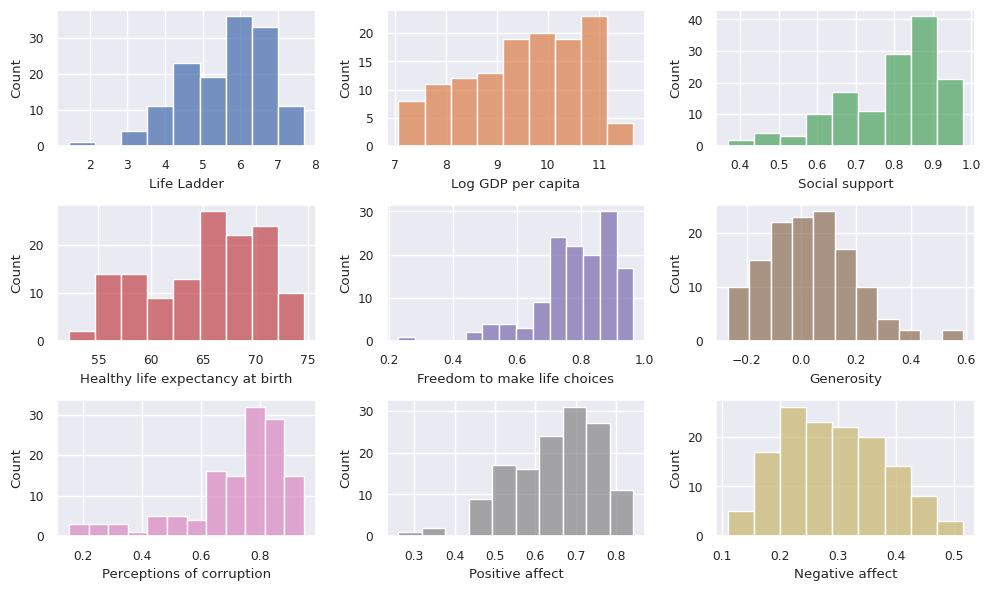

In [ ]:
sns.set_theme(font_scale = 0.8)
variables = ['Life Ladder', 'Log GDP per capita', 'Social support', 'Healthy life expectancy at birth',
             'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Positive affect', 'Negative affect']

fig, axs = plt.subplots(3, 3, figsize = (10, 6))
axs = axs.flatten()

palette = itertools.cycle(sns.color_palette())

for i, var in enumerate(variables):
    sns.histplot(data = df_enhanced_2023, x = var, ax=axs[i], color = next(palette), legend = False)

fig.tight_layout()

### Box Plots of Key Variables

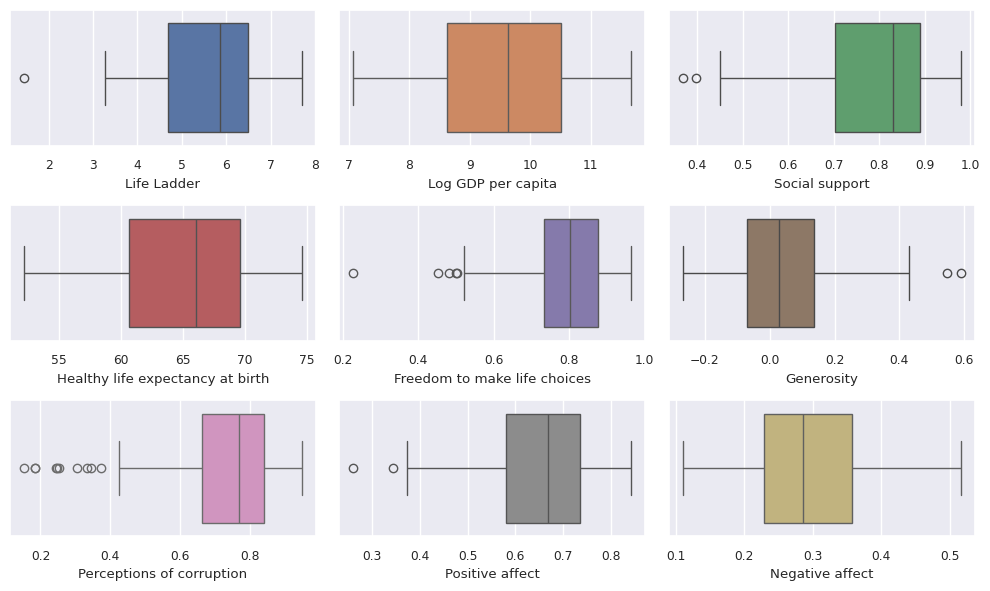

In [ ]:
sns.set_theme(font_scale = 0.8)
variables = ['Life Ladder', 'Log GDP per capita', 'Social support', 'Healthy life expectancy at birth',
             'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Positive affect', 'Negative affect']

fig, axs = plt.subplots(3, 3, figsize = (10, 6))
axs = axs.flatten()

palette = itertools.cycle(sns.color_palette())

for i, var in enumerate(variables):
    sns.boxplot(data = df_enhanced_2023, x = var, ax=axs[i], color = next(palette), showfliers = True)

fig.tight_layout()

### Identifying Outliers for Variables

I find outliers using the 1.5 $\times$ IQR Rule.

Outliers by variable:
* **Life Ladder**: Afghanistan (unusually low)
* **Social Support**: Afghanistan, Benin (all unusually low)
* **Freedom to make life choices**: Afghanistan, Comoros, Lebanon, Madagascar, Tunisia (all unusually low)
* **Generosity**: Indonesia, Myanmar (all unusually high)
* **Perceptions of corruption**: Singapore, Denmark, Finland, Norway, Switzerland, Sweden, New Zealand, Estonia, Luxembourg, Ireland
(all unusually low)
* **Positive affect**: Afghanistan, Türkiye (all unusually low)

In [ ]:
def retrieve_outliers(df, variable):
  percentile_25 = df[variable].quantile(0.25)
  percentile_75 = df[variable].quantile(0.75)

  iqr = percentile_75 - percentile_25

  upper_limit = percentile_75 + 1.5 * iqr
  lower_limit = percentile_25 - 1.5 * iqr

  print(f"Lower Bound: {lower_limit}, Upper Bound: {upper_limit}")
  return df[(df[variable] < lower_limit) | (df[variable] > upper_limit)]

In [ ]:
retrieve_outliers(df_enhanced_2023, 'Life Ladder')

Lower Bound: 1.968887448310852, Upper Bound: 9.197713971138


,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,SDG Region
14,Afghanistan,2023,1.445909,NaN,0.368478,55.200001,0.228301,NaN,0.738471,0.260513,0.460167,Central and Southern Asia


In [ ]:
retrieve_outliers(df_enhanced_2023, 'Social support')

Lower Bound: 0.4201178103685379, Upper Bound: 1.1713910847902298


,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,SDG Region
14,Afghanistan,2023,1.445909,NaN,0.368478,55.200001,0.228301,NaN,0.738471,0.260513,0.460167,Central and Southern Asia
207,Benin,2023,4.419834,8.173913,0.398188,56.700001,0.785601,-0.072595,0.575305,0.573023,0.428077,Sub-Saharan Africa


In [ ]:
retrieve_outliers(df_enhanced_2023, 'Freedom to make life choices')

Lower Bound: 0.5221652612090111, Upper Bound: 1.0882667526602745


,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,SDG Region
14,Afghanistan,2023,1.445909,NaN,0.368478,55.200001,0.228301,NaN,0.738471,0.260513,0.460167,Central and Southern Asia
448,Comoros,2023,3.588056,8.094625,0.482587,59.599998,0.452211,0.004197,0.704127,0.535040,0.404681,Sub-Saharan Africa
1194,Lebanon,2023,3.587908,9.471326,0.685646,66.300003,0.499206,-0.102335,0.895419,0.373127,0.385295,Northern Africa and Western Asia
1262,Madagascar,2023,4.433001,7.332643,0.692405,58.299999,0.503716,0.095865,0.783531,0.718467,0.389158,Sub-Saharan Africa
2126,Tunisia,2023,4.505141,9.281789,0.701545,67.099998,0.482242,-0.226395,0.882402,0.461158,0.364168,Northern Africa and Western Asia


In [ ]:
retrieve_outliers(df_enhanced_2023, 'Generosity')

Lower Bound: -0.38497380539774895, Upper Bound: 0.4518715627491474


,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,SDG Region
922,Indonesia,2023,5.694870,9.465582,0.780544,63.299999,0.900428,0.589554,0.866237,0.813895,0.289472,Eastern and South-Eastern Asia
1454,Myanmar,2023,4.390634,8.347352,0.684586,62.200001,0.695295,0.547801,0.686381,0.634079,0.357779,Eastern and South-Eastern Asia


In [ ]:
retrieve_outliers(df_enhanced_2023, 'Perceptions of corruption').sort_values(by = 'Perceptions of corruption')

Lower Bound: 0.39662201702594757, Upper Bound: 1.1034495383501053


,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,SDG Region
1851,Singapore,2023,6.653942,NaN,0.916326,74.000000,0.861233,NaN,0.152543,0.667157,0.190486,Eastern and South-Eastern Asia
556,Denmark,2023,7.504193,10.996293,0.915670,71.500000,0.922739,0.089434,0.183567,0.757006,0.229489,Europe and Northern America
680,Finland,2023,7.698929,10.808451,0.946865,71.300003,0.943418,-0.001130,0.185229,0.716778,0.172830,Europe and Northern America
1594,Norway,2023,7.248675,11.124797,0.951586,71.599998,0.937649,0.219493,0.244850,0.756484,0.228338,Europe and Northern America
2017,Switzerland,2023,6.968833,11.169257,0.903757,73.300003,0.890972,0.103554,0.246744,0.745368,0.184582,Europe and Northern America
2004,Sweden,2023,7.160777,10.902137,0.926618,72.400002,0.926379,0.146668,0.253074,0.738826,0.194445,Europe and Northern America
1515,New Zealand,2023,6.975955,10.719568,0.932887,70.500000,0.876608,0.181392,0.303656,0.738133,0.228583,Australia and New Zealand
649,Estonia,2023,6.429873,10.516722,0.958171,70.099998,0.914573,0.031501,0.333731,0.764900,0.182296,Europe and Northern America
1249,Luxembourg,2023,7.016062,11.648711,0.879195,71.699997,0.910813,0.033440,0.343211,0.750700,0.194495,Europe and Northern America
970,Ireland,2023,6.816531,11.675588,0.921254,71.500000,0.902766,0.182178,0.373317,0.741770,0.245300,Europe and Northern America


In [ ]:
retrieve_outliers(df_enhanced_2023, 'Positive affect')

Lower Bound: 0.34920425713062286, Upper Bound: 0.967176154255867


,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,SDG Region
14,Afghanistan,2023,1.445909,NaN,0.368478,55.200001,0.228301,NaN,0.738471,0.260513,0.460167,Central and Southern Asia
2154,Türkiye,2023,5.462700,10.429203,0.859527,69.099998,0.522797,-0.159018,0.747561,0.344347,0.348513,Northern Africa and Western Asia


### Top & Bottom Countries for Each Variable

In [ ]:
def retrieve_top(df, variable):
  return df.sort_values(by = variable, ascending = False).head(10)

def retrieve_bottom(df, variable):
  return df.sort_values(by = variable, ascending = True).head(10)

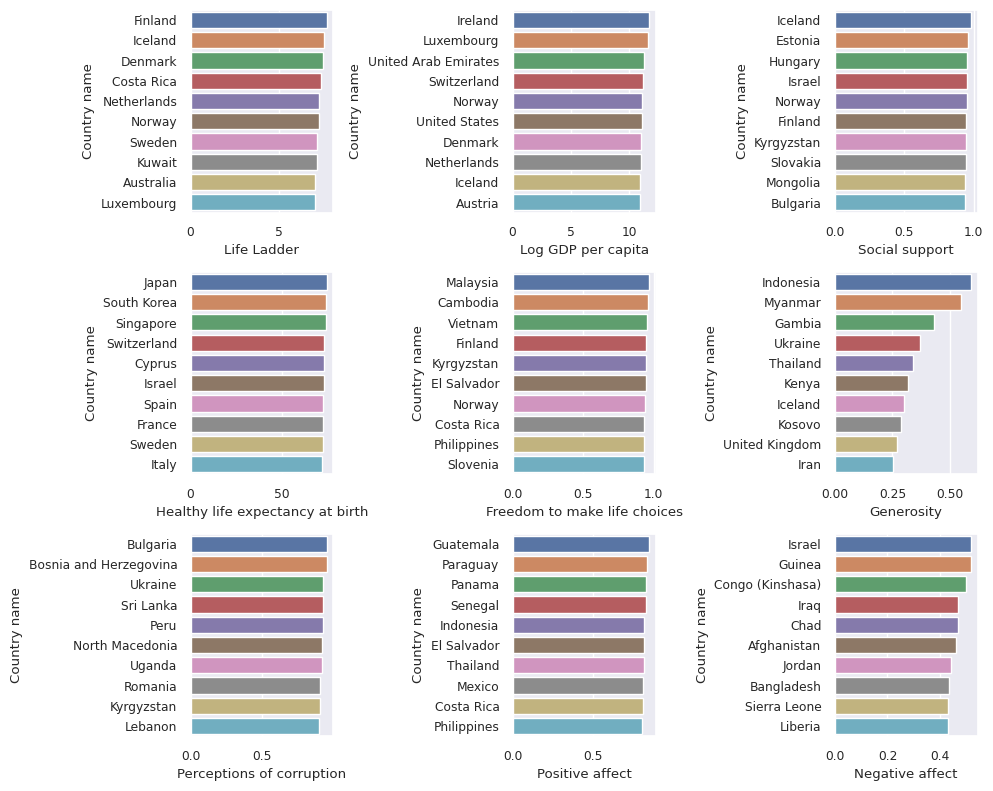

In [ ]:
sns.set_theme(font_scale = 0.8)
variables = ['Life Ladder', 'Log GDP per capita', 'Social support', 'Healthy life expectancy at birth',
             'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Positive affect', 'Negative affect']

fig, axs = plt.subplots(3, 3, figsize = (10, 8))
axs = axs.flatten()

for i, var in enumerate(variables):
    sns.barplot(data = retrieve_top(df_enhanced_2023, var), y = 'Country name', x = var, ax=axs[i], hue = 'Country name')

fig.tight_layout()

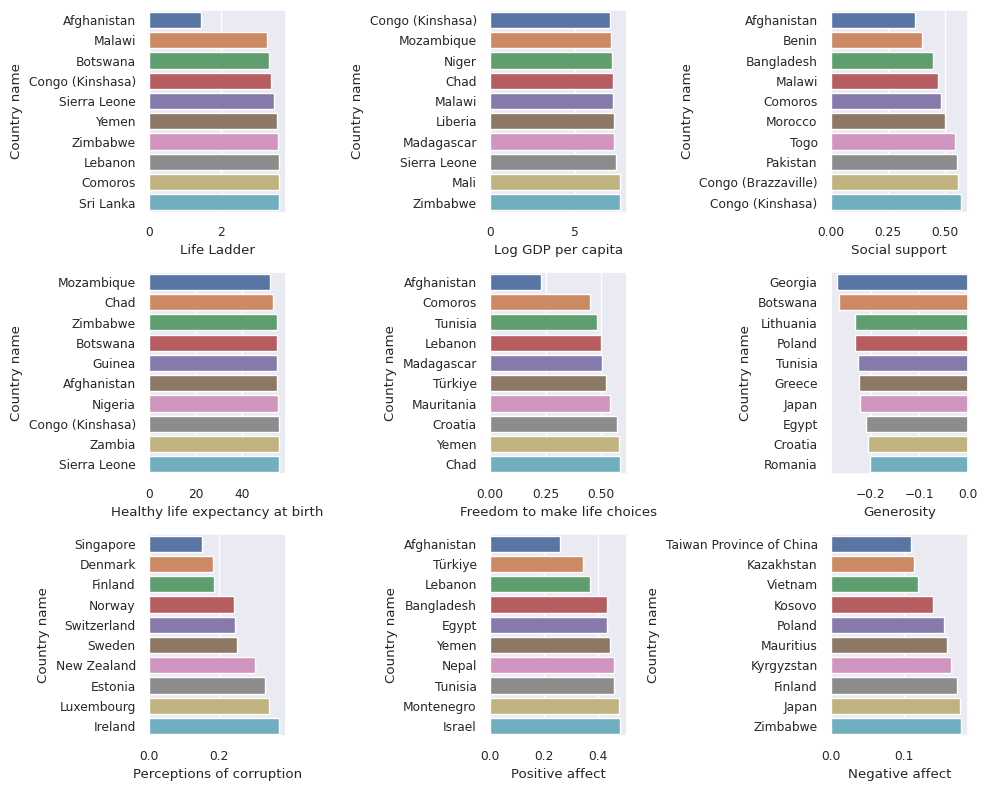

In [ ]:
sns.set_theme(font_scale = 0.8)
variables = ['Life Ladder', 'Log GDP per capita', 'Social support', 'Healthy life expectancy at birth',
             'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Positive affect', 'Negative affect']

fig, axs = plt.subplots(3, 3, figsize = (10, 8))
axs = axs.flatten()

for i, var in enumerate(variables):
    sns.barplot(data = retrieve_bottom(df_enhanced_2023, var), y = 'Country name', x = var, ax=axs[i], hue = 'Country name')

fig.tight_layout()

### Correlation Factors
I use a heatmap and scatterplot to explore correlations between the variables.

<Axes: >

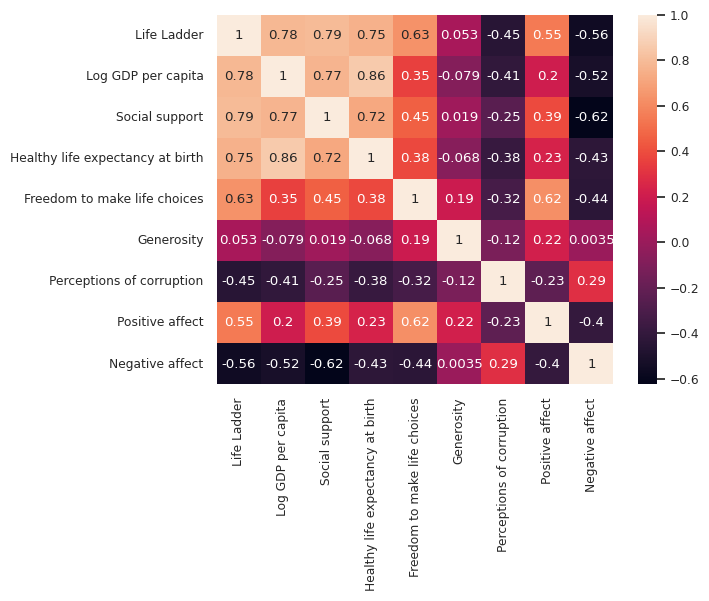

In [ ]:
variables = ['Life Ladder', 'Log GDP per capita', 'Social support', 'Healthy life expectancy at birth',
             'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Positive affect', 'Negative affect']
sns.heatmap(df_enhanced_2023[variables].corr(), annot = True)

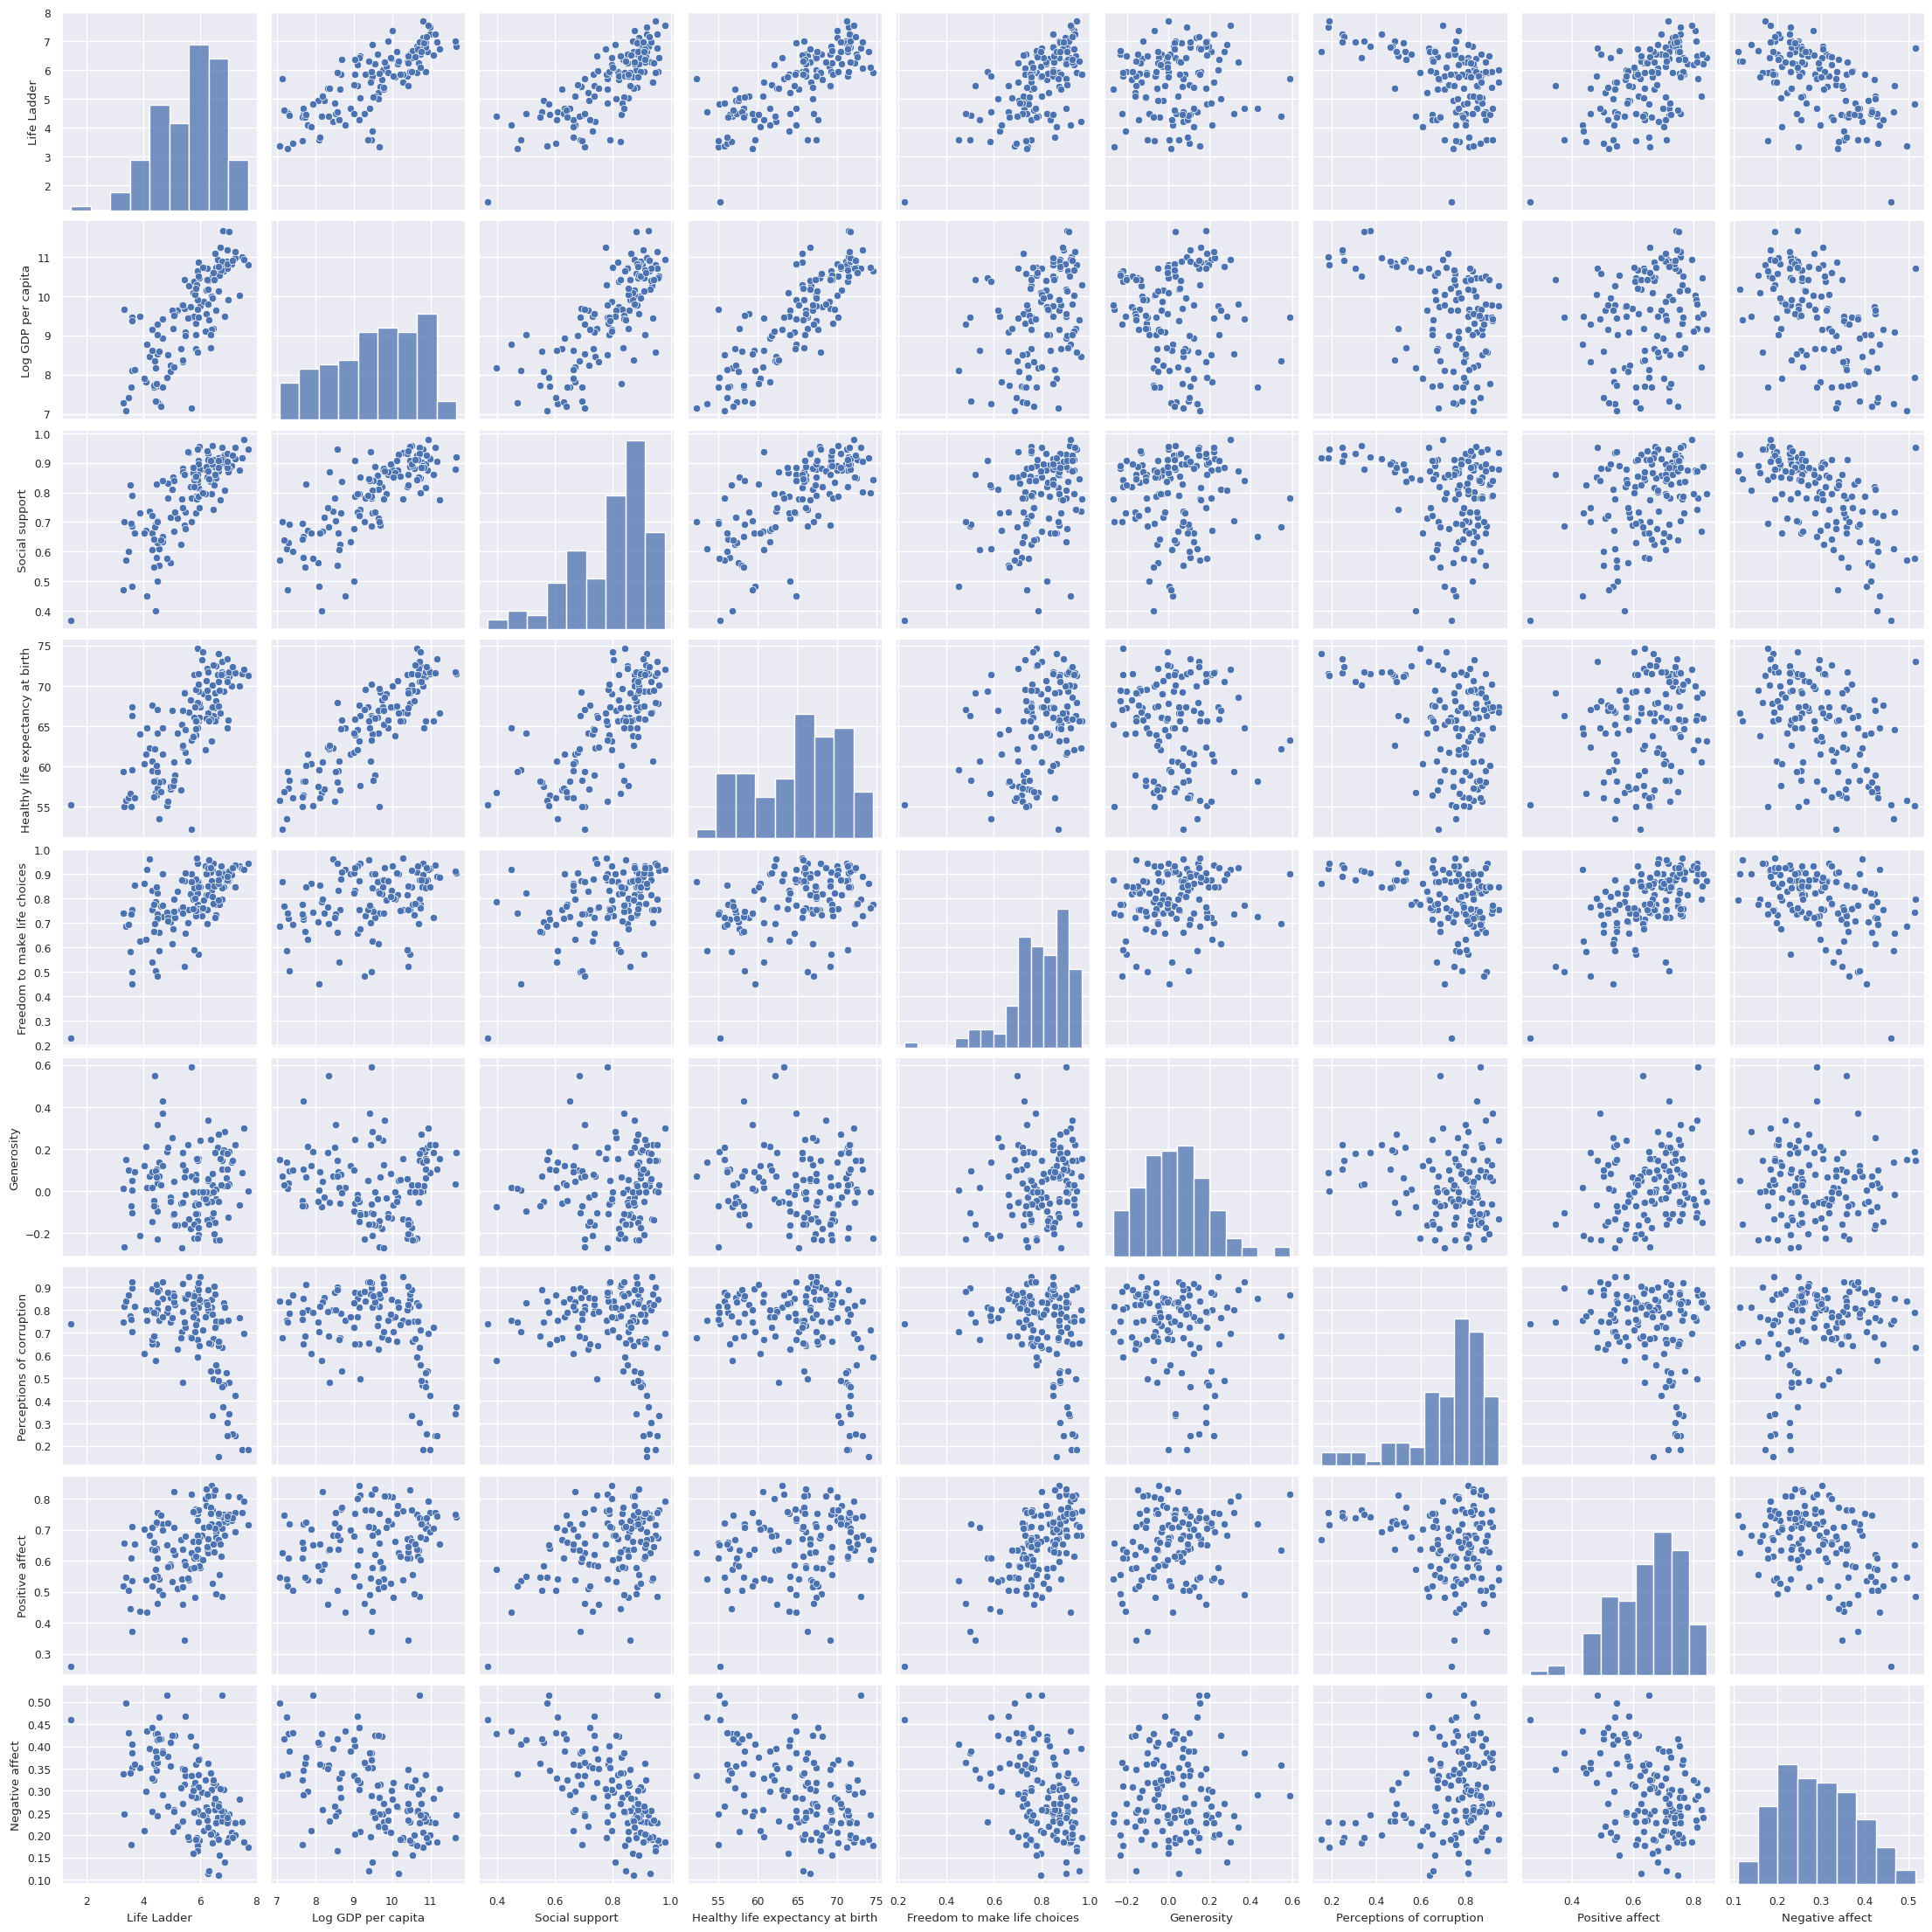

In [ ]:
sns.pairplot(df_enhanced_2023[variables])

## Visualizations for regional data

I perform analysis on data by region. I explore the following:
* Comparison of regional averages for each of the variables
* Distribution of life ladder with each region
* Regional averages over time


### Comparison of Regional Averages (in 2023)

In [ ]:
df_enhanced_2023_by_region = df_enhanced_2023.groupby(['SDG Region'])[variables].mean().reset_index()

In [ ]:
df_enhanced_2023_by_region

,SDG Region,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Australia and New Zealand,7.000269,10.783001,0.914674,70.849998,0.876189,0.184350,0.392618,0.734593,0.238373
1,Central and Southern Asia,4.795818,8.976584,0.728005,63.563637,0.761324,0.108530,0.770430,0.572668,0.321910
2,Eastern and South-Eastern Asia,5.822002,9.546149,0.809833,66.461538,0.851884,0.130332,0.701017,0.700128,0.240355
3,Europe and Northern America,6.464631,10.543397,0.890167,69.780000,0.825881,0.047294,0.650407,0.655644,0.243595
4,Latin America and the Caribbean,6.297139,9.579488,0.838385,66.894445,0.852402,-0.067082,0.773729,0.774483,0.298430
5,Northern Africa and Western Asia,5.363794,9.968547,0.777354,66.455555,0.728877,-0.062718,0.755060,0.550639,0.349567
6,Sub-Saharan Africa,4.457542,8.110556,0.655264,57.696969,0.723019,0.045606,0.778973,0.640541,0.336789


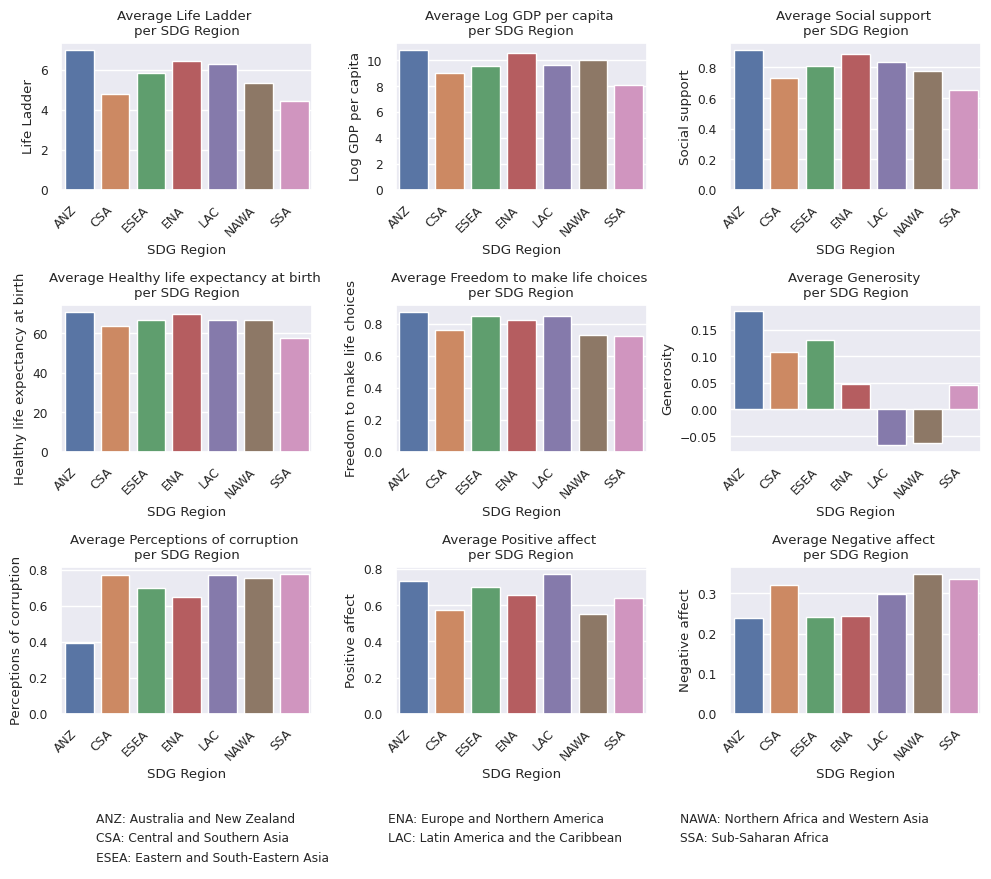

In [ ]:
sns.set_theme(font_scale = 0.8)
variables = ['Life Ladder', 'Log GDP per capita', 'Social support', 'Healthy life expectancy at birth',
             'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Positive affect', 'Negative affect']
region_abbreviations = {
    'Australia and New Zealand': 'ANZ',
    'Central and Southern Asia': 'CSA',
    'Eastern and South-Eastern Asia': 'ESEA',
    'Europe and Northern America': 'ENA',
    'Latin America and the Caribbean': 'LAC',
    'Northern Africa and Western Asia': 'NAWA',
    'Sub-Saharan Africa': 'SSA'
}

fig, axs = plt.subplots(3, 3, figsize = (10, 8))
axs = axs.flatten()

for i, var in enumerate(variables):
    sns.barplot(data = df_enhanced_2023_by_region, x = 'SDG Region', hue = 'SDG Region', y = var, ax = axs[i])
    axs[i].set_xticks(range(len(region_abbreviations)))
    axs[i].set_xticklabels([region_abbreviations.get(label.get_text(), label.get_text())
                            for label in axs[i].get_xticklabels()], rotation=45, ha='right')
    axs[i].set_title(f'Average {var} \nper SDG Region')

legend_elements = [plt.Line2D([0], [0], color='none', label=f'{abbr}: {region}')
                   for region, abbr in region_abbreviations.items()]
fig.legend(handles=legend_elements, loc='lower center', bbox_to_anchor=(0.5, -0.1), ncol=3, frameon=False)

fig.tight_layout()

### Distribution of Life Ladder within Each Region

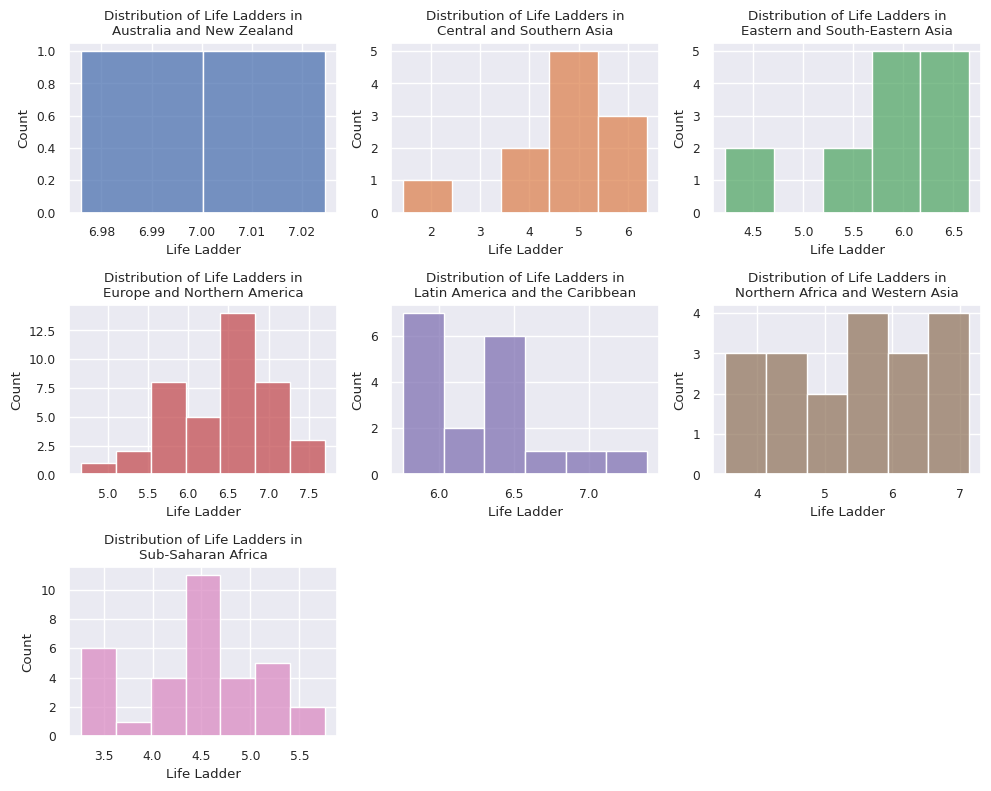

In [ ]:
sns.set_theme(font_scale = 0.8)

regions = df_enhanced_2023['SDG Region'].unique()

regions = ['Australia and New Zealand', 'Central and Southern Asia', 'Eastern and South-Eastern Asia',
           'Europe and Northern America', 'Latin America and the Caribbean', 'Northern Africa and Western Asia', 'Sub-Saharan Africa']


fig, axs = plt.subplots(3, 3, figsize = (10, 8))
axs = axs.flatten()

palette = itertools.cycle(sns.color_palette())


for i, region in enumerate(regions):
    sns.histplot(data = df_enhanced_2023[df_enhanced_2023['SDG Region'] == region], x = 'Life Ladder', color = next(palette), ax=axs[i])
    axs[i].set_title(f'Distribution of Life Ladders in\n{region}')

fig.delaxes(axs[7])
fig.delaxes(axs[8])
fig.tight_layout()

In [ ]:
df_enhanced_2023[df_enhanced_2023['SDG Region'] == 'Australia and New Zealand']

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,SDG Region
97,Australia,2023,7.024582,10.846434,0.896460,71.199997,0.875769,0.187309,0.481580,0.731053,0.248163,Australia and New Zealand
1515,New Zealand,2023,6.975955,10.719568,0.932887,70.500000,0.876608,0.181392,0.303656,0.738133,0.228583,Australia and New Zealand


### Regional Averages Over the Years

In [ ]:
df_enhanced_by_region_year = df_enhanced.groupby(['SDG Region', 'year'])[variables].mean().reset_index()

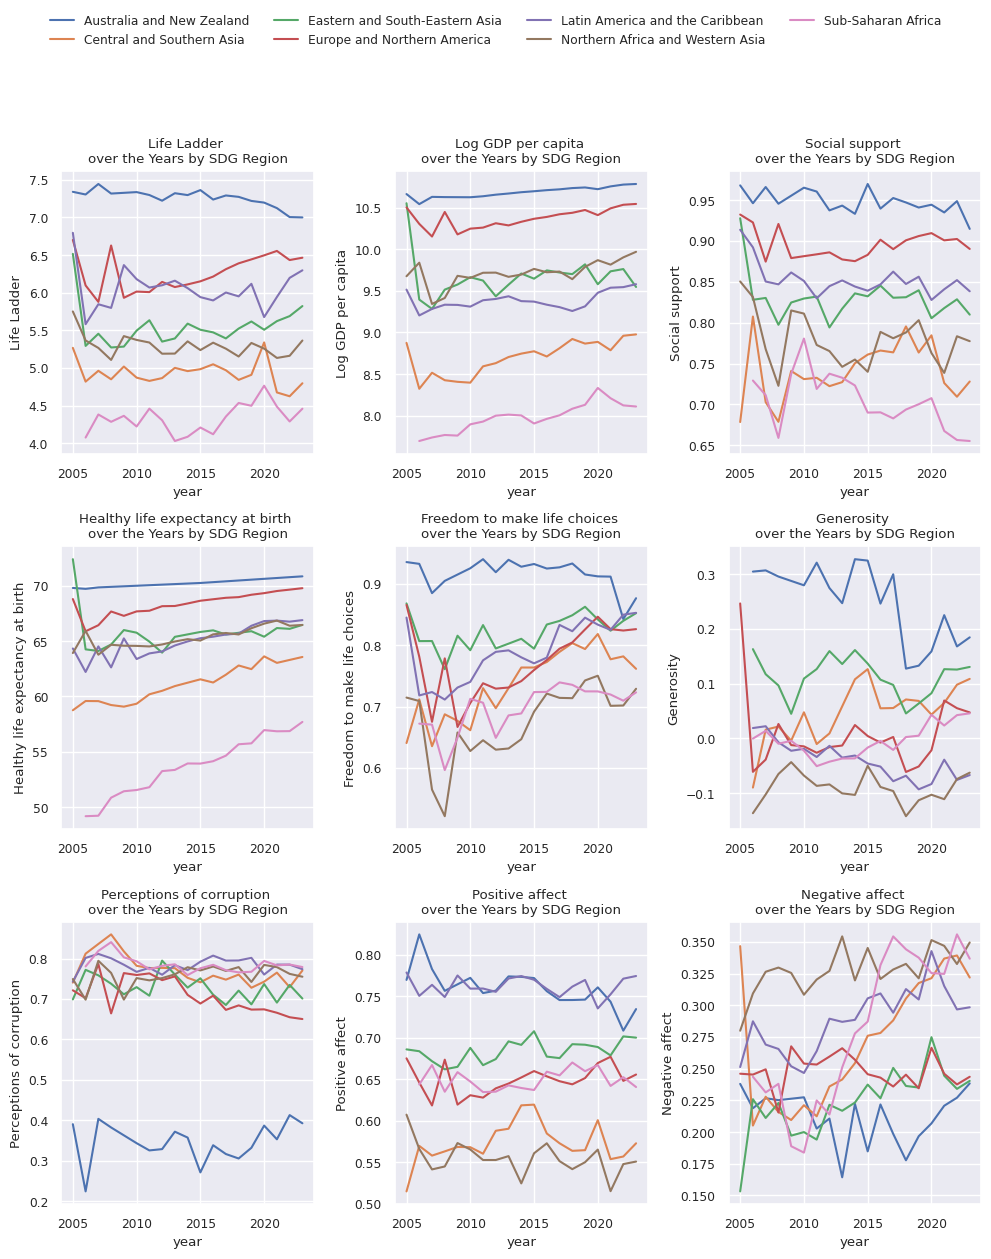

In [ ]:
sns.set_theme(font_scale = 0.8)
variables = ['Life Ladder', 'Log GDP per capita', 'Social support', 'Healthy life expectancy at birth',
             'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Positive affect', 'Negative affect']

fig, axs = plt.subplots(3, 3, figsize = (10, 12))
axs = axs.flatten()

palette = itertools.cycle(sns.color_palette())


handles, labels = None, None

for i, var in enumerate(variables):
  sns.lineplot(data = df_enhanced_by_region_year, x = 'year', y = var, hue = 'SDG Region', ax = axs[i], legend = (i == 0))
  axs[i].set_title(f'{var} \nover the Years by SDG Region')

  if i == 0:
    handles, labels = axs[i].get_legend_handles_labels()
    axs[i].legend_.remove()

fig.legend(handles, labels, loc = 'upper center', bbox_to_anchor = (0.5, 1.1), ncol = 4, frameon = False)

fig.tight_layout(rect = [0, 0.05, 1, 1])

### Variables over Time for the US


In [ ]:
df_enhanced_us = df_enhanced[df_enhanced['Country name'] == 'United States']

In [ ]:
df_enhanced_us

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,SDG Region
2225,United States,2006,7.181794,10.920668,0.964572,66.779999,0.911496,NaN,0.600309,0.774833,0.260511,Europe and Northern America
2226,United States,2007,7.512688,10.931063,NaN,66.760002,0.871904,0.191135,0.633035,0.755915,0.231679,Europe and Northern America
2227,United States,2008,7.280386,10.922826,0.952587,66.739998,0.877956,0.248561,0.668495,0.774229,0.226823,Europe and Northern America
2228,United States,2009,7.158032,10.887716,0.911794,66.720001,0.830684,0.194568,0.665394,0.752766,0.261661,Europe and Northern America
2229,United States,2010,7.163616,10.906148,0.926159,66.699997,0.828044,0.237741,0.689583,0.776061,0.231053,Europe and Northern America
2230,United States,2011,7.115139,10.914260,0.921705,66.680000,0.863202,0.154507,0.696926,0.736951,0.273379,Europe and Northern America
2231,United States,2012,7.026227,10.929475,0.903192,66.660004,0.822662,0.208500,0.710034,0.764520,0.259644,Europe and Northern America
2232,United States,2013,7.249285,10.940798,0.925397,66.639999,0.792256,0.267717,0.746894,0.776116,0.260328,Europe and Northern America
2233,United States,2014,7.151114,10.956084,0.902097,66.620003,0.866077,0.215256,0.702267,0.785791,0.281265,Europe and Northern America
2234,United States,2015,6.863947,10.975426,0.903571,66.599998,0.848753,0.213495,0.697543,0.768671,0.274688,Europe and Northern America


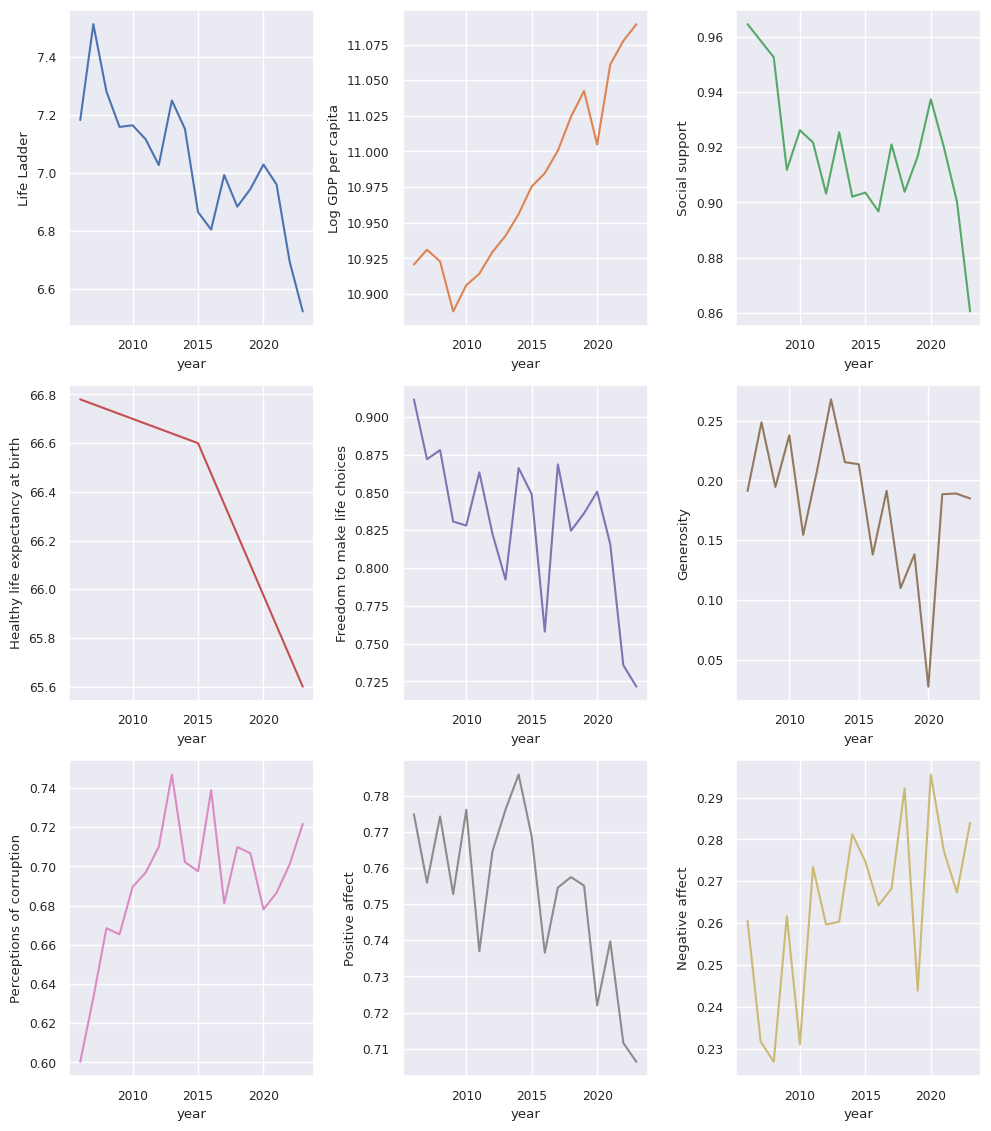

In [ ]:
sns.set_theme(font_scale = 0.8)
variables = ['Life Ladder', 'Log GDP per capita', 'Social support', 'Healthy life expectancy at birth',
             'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Positive affect', 'Negative affect']

fig, axs = plt.subplots(3, 3, figsize = (10, 12))
axs = axs.flatten()

palette = itertools.cycle(sns.color_palette())


for i, var in enumerate(variables):
  sns.lineplot(data = df_enhanced_us, x = 'year', y = var, ax = axs[i], color = next(palette))

fig.tight_layout(rect = [0, 0.05, 1, 1])

# Predictive Modeling (using 2023 data)

I attempt machine learning models for predicting happiness scores (**Life Ladder**). I use the latest data (2023) and try linear regression, support vector regression (SVR), and random forest models.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

## Data Cleaning - Dealing with missing values

There are 18 entries that contain missing data. Given that these entries make up ~13% of the dataset, I simply drop them.

In [ ]:
df_enhanced_2023.info()

<class 'pandas.core.frame.DataFrame'>
Index: 138 entries, 14 to 2362
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      138 non-null    object 
 1   year                              138 non-null    int64  
 2   Life Ladder                       138 non-null    float64
 3   Log GDP per capita                129 non-null    float64
 4   Social support                    138 non-null    float64
 5   Healthy life expectancy at birth  135 non-null    float64
 6   Freedom to make life choices      136 non-null    float64
 7   Generosity                        129 non-null    float64
 8   Perceptions of corruption         131 non-null    float64
 9   Positive affect                   138 non-null    float64
 10  Negative affect                   138 non-null    float64
 11  SDG Region                        138 non-null    object 
dtypes: float64(

In [ ]:
df_enhanced_2023[df_enhanced_2023.isna().any(axis = 1)]

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,SDG Region
14,Afghanistan,2023,1.445909,NaN,0.368478,55.200001,0.228301,NaN,0.738471,0.260513,0.460167,Central and Southern Asia
141,Bahrain,2023,5.959068,10.876858,0.817477,65.599998,0.868561,0.154635,NaN,0.670569,0.335940,Northern Africa and Western Asia
422,China,2023,6.144764,9.860808,0.796983,69.000000,0.793378,-0.031571,NaN,0.707985,0.210350,Eastern and South-Eastern Asia
523,Cyprus,2023,6.070594,NaN,0.802831,73.199997,0.729810,NaN,0.839832,0.681513,0.296864,Northern Africa and Western Asia
614,Egypt,2023,3.880640,9.479594,0.729671,64.000000,0.625341,-0.210252,NaN,0.435857,0.352330,Northern Africa and Western Asia
1116,Kosovo,2023,6.877793,9.480271,0.807213,NaN,0.899681,0.285178,0.810932,0.682165,0.139781,Europe and Northern America
1129,Kuwait,2023,7.130284,10.811560,0.890011,70.000000,0.897539,0.136041,NaN,0.729435,0.206978,Northern Africa and Western Asia
1218,Libya,2023,5.970289,NaN,0.748157,66.099998,0.762223,NaN,0.643733,0.584836,0.372078,Northern Africa and Western Asia
1326,Malta,2023,6.294855,NaN,0.911656,71.699997,0.850815,NaN,0.780031,0.643816,0.361336,Europe and Northern America
1549,Niger,2023,4.608658,7.181249,0.637947,56.900002,0.766963,0.029012,NaN,0.747266,0.416637,Sub-Saharan Africa


In [ ]:
df_enhanced_2023.dropna(inplace = True)

<ipython-input-50-34e987e41115>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_enhanced_2023.dropna(inplace = True)


In [ ]:
df_enhanced_2023.shape

(120, 12)

## Split the dataset

In [ ]:
x = df_enhanced_2023.drop(['year', 'Life Ladder', 'Country name', 'SDG Region'], axis = 1)
y = df_enhanced_2023['Life Ladder']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [ ]:
sc = StandardScaler()

# Normalizing the training and test sets (Note: normalization is not necessary for Random Forest)
x_train_norm = sc.fit_transform(x_train)
x_test_norm = sc.transform(x_test)

## Using Linear Regression

In [ ]:
lin_regr = LinearRegression()
lin_regr.fit(x_train_norm, y_train)

LinearRegression()

In [ ]:
y_pred_lin_regr = lin_regr.predict(x_test_norm)

## Using SVM Regression

In [ ]:
svr = SVR()
svr.fit(x_train_norm, y_train)

SVR()

In [ ]:
y_pred_svr = svr.predict(x_test_norm)

## Using Random Forest

In [ ]:
rand_forest = RandomForestRegressor()
rand_forest.fit(x_train, y_train)

RandomForestRegressor()

In [ ]:
y_pred_rand_forest = rand_forest.predict(x_test)

## Comparison of Models

I use the mean squared error (MSE) and R-squared as metrics to evaluate each model. While all the models have similar MSEs and R-squared values, the SVR model has a slightly better MSE and R-squared.

In [ ]:
print("Mean Squared Errors")
print("Linear Regression: " + str(mean_squared_error(y_test, y_pred_lin_regr)))
print("SVR: " + str(mean_squared_error(y_test, y_pred_svr)))
print("Random Forest: " + str(mean_squared_error(y_test, y_pred_rand_forest)))

Mean Squared Errors
Linear Regression: 0.11828427532321235
SVR: 0.12954319361136135
Random Forest: 0.20042331422312074


In [ ]:
print("R2 Scores")
print("Linear Regression: " + str(r2_score(y_test, y_pred_lin_regr)))
print("SVR: " + str(r2_score(y_test, y_pred_svr)))
print("Random Forest: " + str(r2_score(y_test, y_pred_rand_forest)))

R2 Scores
Linear Regression: 0.8579049890956566
SVR: 0.8443796399944842
Random Forest: 0.7592312846132796


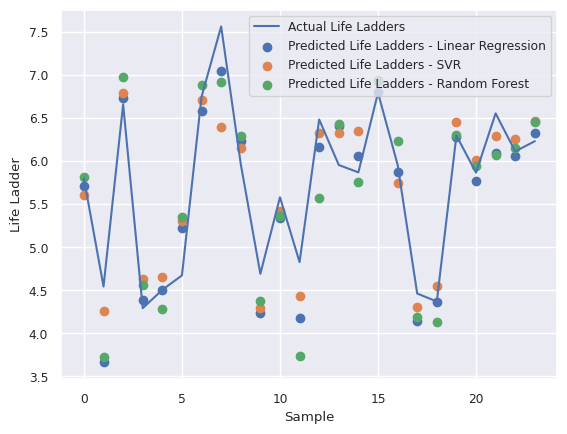

In [ ]:
x_ax = range(len(y_test))

plt.plot(x_ax, y_test, label = 'Actual Life Ladders')
plt.scatter(x_ax, y_pred_lin_regr, label = 'Predicted Life Ladders - Linear Regression')
plt.scatter(x_ax, y_pred_svr, label = 'Predicted Life Ladders - SVR')
plt.scatter(x_ax, y_pred_rand_forest, label = 'Predicted Life Ladders - Random Forest')
plt.legend()
plt.xlabel('Sample')
plt.ylabel('Life Ladder')
plt.show()

In [ ]:
import pickle

pickle.dump(sc, open('scalar.pkl', 'wb'))
pickle.dump(lin_regr, open('linear_regr_model.pkl', 'wb'))